# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using matplotlib.

In [1]:
pip install pandas matplotlib seaborn openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Excel File

In [3]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('Rate of personal theft larceny victimizations 1993-2023.xlsx')

# Inspect the data
print(df.info())

# Display the first few rows of the dataframe to check the data
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   31 non-null     int64  
 1   Crime Type                             31 non-null     object 
 2   Number                                 31 non-null     int64  
 3   Number CI Lower Bound                  31 non-null     int64  
 4   Number CI Upper Bound                  31 non-null     int64  
 5   Number SE                              31 non-null     int64  
 6   Rate per 1000 persons age 12 or older  31 non-null     float64
 7   Rate CI Lower Bound                    31 non-null     float64
 8   Rate CI Upper Bound                    31 non-null     float64
 9   Rate SE                                31 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.6+ KB
None


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Personal theft/larceny,481384,345976,616792,69087,2.3,1.64,2.92,0.33
1,1994,Personal theft/larceny,502966,388772,617160,58263,2.4,1.82,2.90,0.27
2,1995,Personal theft/larceny,414140,316051,512229,50046,1.9,1.47,2.38,0.23
3,1996,Personal theft/larceny,328772,244757,412788,42866,1.5,1.13,1.90,0.20
4,1997,Personal theft/larceny,369860,256315,483405,57932,1.7,1.17,2.20,0.26
5,1998,Personal theft/larceny,295622,212375,378870,42474,1.3,0.96,1.71,0.19
6,1999,Personal theft/larceny,238381,156709,320053,41670,1.1,0.70,1.43,0.19
7,2000,Personal theft/larceny,273958,191762,356154,41937,1.2,0.85,1.57,0.18
8,2001,Personal theft/larceny,188368,126767,249969,31430,0.8,0.55,1.09,0.14
9,2002,Personal theft/larceny,155397,90573,220222,33074,0.7,0.39,0.95,0.14


## Step 2: Clean and Prepare the Data

In [4]:
# Drop rows with missing values (if needed)
df.dropna(inplace=True)

# Ensure the 'Year' column is an integer and 'Value' is a float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
print(df.isnull().sum())

# Display the cleaned data
df.head(15)

Year                                     0
Crime Type                               0
Number                                   0
Number CI Lower Bound                    0
Number CI Upper Bound                    0
Number SE                                0
Rate per 1000 persons age 12 or older    0
Rate CI Lower Bound                      0
Rate CI Upper Bound                      0
Rate SE                                  0
dtype: int64


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Personal theft/larceny,481384,345976,616792,69087,2.3,1.64,2.92,0.33
1,1994,Personal theft/larceny,502966,388772,617160,58263,2.4,1.82,2.90,0.27
2,1995,Personal theft/larceny,414140,316051,512229,50046,1.9,1.47,2.38,0.23
3,1996,Personal theft/larceny,328772,244757,412788,42866,1.5,1.13,1.90,0.20
4,1997,Personal theft/larceny,369860,256315,483405,57932,1.7,1.17,2.20,0.26
5,1998,Personal theft/larceny,295622,212375,378870,42474,1.3,0.96,1.71,0.19
6,1999,Personal theft/larceny,238381,156709,320053,41670,1.1,0.70,1.43,0.19
7,2000,Personal theft/larceny,273958,191762,356154,41937,1.2,0.85,1.57,0.18
8,2001,Personal theft/larceny,188368,126767,249969,31430,0.8,0.55,1.09,0.14
9,2002,Personal theft/larceny,155397,90573,220222,33074,0.7,0.39,0.95,0.14


## Step 3: Plot Line Graphs Rate per 1000 persons age 12 or older

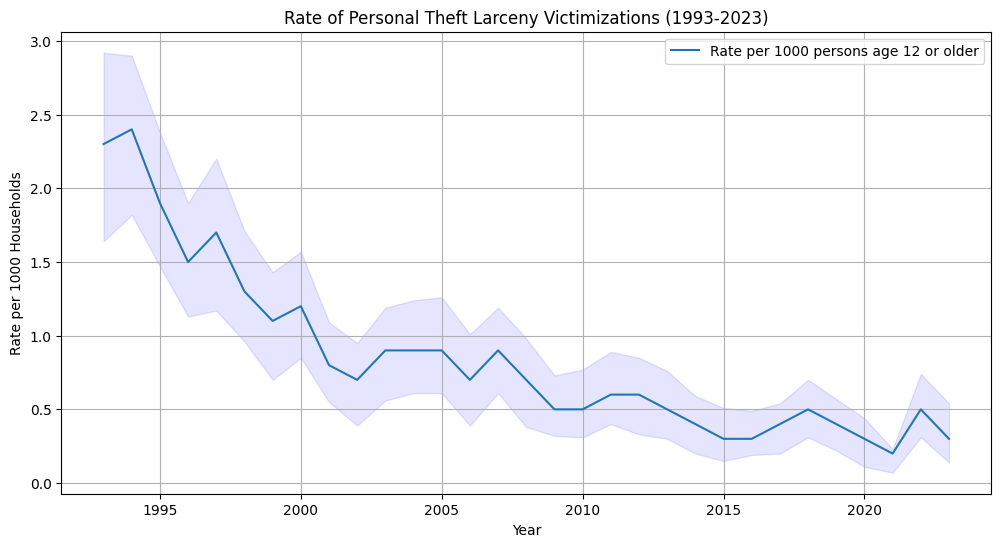

In [6]:
# Plot the 'Rate per 1000 households' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', data=df, label='Rate per 1000 persons age 12 or older')
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

# Add labels and title
plt.title('Rate of Personal Theft Larceny Victimizations (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 Households')

# Display the plot with a grid and legend
plt.grid(True)
plt.legend()
plt.show()

## Step 4: Plot Multiple Series Graphs Rate per 1000 persons age 12 or older

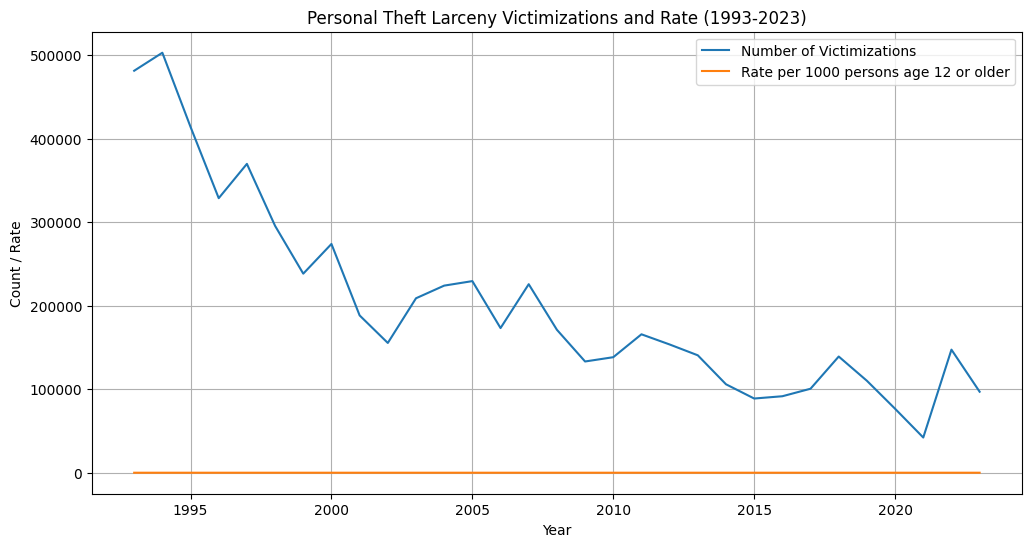

In [8]:
# Plot Multiple Series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number', data=df, label='Number of Victimizations')
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', data=df, label='Rate per 1000 persons age 12 or older')
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

plt.title('Personal Theft Larceny Victimizations and Rate (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.grid(True)
plt.legend()
plt.show()